In [32]:
import os
import tensorflow as tf
import tensorflow.keras as kr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend
from tensorflow.keras.constraints import min_max_norm
from tensorflow.keras import Input
from tensorflow.keras import initializers
import os as os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

In [2]:
# Function to initialize GPU
def prep_gpu():
    phy_gpus = tf.config.list_physical_devices(device_type='GPU')

    for gpu in phy_gpus:
        tf.config.experimental.set_memory_growth(device=gpu, enable=True)

    log_gpus = tf.config.list_logical_devices(device_type='GPU')
    phy_cpus = tf.config.list_physical_devices(device_type='CPU')
    log_cpus = tf.config.list_logical_devices(device_type='CPU')

    print("Physical GPUs: {}\tLogical GPUs: {}\nPhysical CPUs: {}\tLogical CPUs: {}".format(len(phy_gpus),
                                                                                             len(log_gpus),
                                                                                             len(phy_cpus),
                                                                                             len(log_cpus)))


In [3]:
# Function to synthetically generate data
def generate_data():
    X, y, coef = datasets.make_regression(n_samples=1000000, n_features=100, n_informative=10, coef=True)
    y = np.reshape(y, newshape=[1000000, 1])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    # normalizing input features
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, y_train, X_test, y_test, coef

In [4]:
# Function to get data from file
def get_data():
    df = pd.read_csv(filepath_or_buffer='./download//DATA/fake_reg.csv')
    X = df[['feature1', 'feature2']]
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # normalizing input features
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, y_train, X_test, y_test

In [7]:
# Get training and test sets
X_train, y_train, X_test, y_test, coef = generate_data()
print("Coefficients:\n{}".format(coef))
print("Training records:{} \tTest records:{}".format(len(X_train), len(X_test)))

#X_train, y_train, X_test, y_test = get_data()
#print("Training records:{}\tTest records:{}".format(len(X_train), len(X_test)))

Coefficients:
[ 0.          0.          0.          0.          0.          0.
 49.24933152 64.36769135  0.          0.          0.          0.
  0.          0.          0.         64.76997126  0.          0.
 88.24193734  0.         95.18903367 69.99547841  0.          0.
  0.          0.          0.          0.          0.         98.7361256
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         49.21492699  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         45.0259162   0.          0.          0.
  0.         28.26630288  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

In [8]:
# Prepare the GPU
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
prep_gpu()

Physical GPUs: 1	Logical GPUs: 1
Physical CPUs: 1	Logical CPUs: 1


In [51]:
# Define model
backend.clear_session()
model = Sequential()

model.add(Input(shape=(100,)))
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dropout(0.5))
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dropout(0.5))
model.add(layer=Dense(128, activation='relu'))
model.add(layer=Dense(1))

model.summary()

# Create early stopping callback
early_stop = EarlyStopping(monitor='loss', mode='min', patience=5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
____________________________________________________

In [49]:
# Fit the model to the training data with CPU device
custom_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=custom_optimizer, loss='mse')
with tf.device(device_name='/device:cpu:0'):
    model.fit(x=X_train, y=y_train, epochs=100, batch_size=1000, verbose=1, callbacks=[early_stop])

Epoch 1/100
700/700 [==============================] - 6s 9ms/step - loss: 41772.8398
Epoch 2/100
700/700 [==============================] - 6s 9ms/step - loss: 32660.0273
Epoch 3/100
700/700 [==============================] - 6s 9ms/step - loss: 28142.2676
Epoch 4/100
700/700 [==============================] - 6s 9ms/step - loss: 25767.1230
Epoch 5/100
700/700 [==============================] - 6s 9ms/step - loss: 24314.8398
Epoch 6/100
700/700 [==============================] - 6s 9ms/step - loss: 23269.2715
Epoch 7/100
700/700 [==============================] - 6s 9ms/step - loss: 22524.4707
Epoch 8/100
700/700 [==============================] - 6s 9ms/step - loss: 21848.7129
Epoch 9/100
700/700 [==============================] - 6s 9ms/step - loss: 21480.5488
Epoch 10/100
700/700 [==============================] - 6s 9ms/step - loss: 21033.2812
Epoch 11/100
700/700 [==============================] - 6s 9ms/step - loss: 20703.8281
Epoch 12/100
700/700 [==============================

<AxesSubplot:>

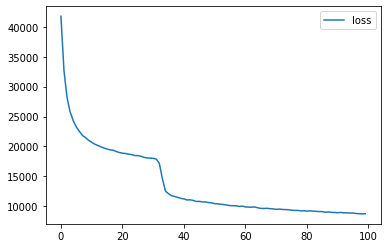

In [50]:
# Evaluate model performance
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()

In [52]:
# Fit the model to the training data with GPU device
custom_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=custom_optimizer, loss='mse')
with tf.device(device_name='/device:gpu:0'):
    model.fit(x=X_train, y=y_train, epochs=100, batch_size=1000, verbose=1, callbacks=[early_stop])

Epoch 1/100
700/700 [==============================] - 3s 4ms/step - loss: 38359.4062
Epoch 2/100
700/700 [==============================] - 3s 4ms/step - loss: 28834.5957
Epoch 3/100
700/700 [==============================] - 3s 4ms/step - loss: 24144.9434
Epoch 4/100
700/700 [==============================] - 3s 4ms/step - loss: 21116.0059
Epoch 5/100
700/700 [==============================] - 3s 4ms/step - loss: 18660.3438
Epoch 6/100
700/700 [==============================] - 3s 4ms/step - loss: 17048.5547
Epoch 7/100
700/700 [==============================] - 3s 4ms/step - loss: 15908.8271
Epoch 8/100
700/700 [==============================] - 3s 4ms/step - loss: 15041.1426
Epoch 9/100
700/700 [==============================] - 3s 4ms/step - loss: 14435.4922
Epoch 10/100
700/700 [==============================] - 3s 4ms/step - loss: 13896.8311
Epoch 11/100
700/700 [==============================] - 3s 4ms/step - loss: 13463.1895
Epoch 12/100
700/700 [==============================

<AxesSubplot:>

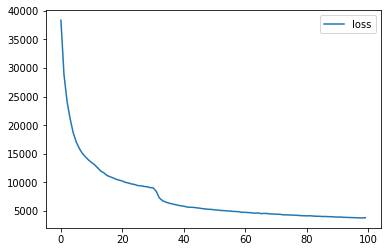

In [53]:
# Evaluate model performance
df_loss = pd.DataFrame(model.history.history)
df_loss.plot()